# Assignment - 2 : K Means Clustering

### AIM : You have to make a cluster for private and government College

1. ### Importing all the important libraries

In [1]:
import pandas as pd #To use different features of pandas for making model like read csv file and operations on it
import numpy as np #for mathematical purpose (Normal array lacks what we can do with numpy array).
import matplotlib.pyplot as plt #Used for plotting graphs.
%matplotlib inline # With this, matplotlib graphs will be included next to the code.

2. ### Analysing the given data 

In [37]:
df = pd.read_csv('College_Data.csv') # storing data inside df
df#viewing the data

0      2885
1      2683
2      1036
3       510
4       249
       ... 
772    3089
773    2849
774    2793
775    5217
776    2988
Name: F.Undergrad, Length: 777, dtype: int64

#### After doing some research on the columns , we got to know
-   Private     -> A factor with levels No and Yes indicating private or public
    university
-   Apps        -> Number of applications received
-   Accept      -> Number of applications accepted
-   Enroll      -> Number of new students enrolled
-   Top10perc   -> Percentage of new students from top 10% of H.S. class
-   Top25perc   -> Percentage of new students from top 25% of H.S. class
-   F.Undergrad -> Number of fulltime undergraduates
-   P.Undergrad -> Number of parttime undergraduates
-   Outstate    -> Out-of-state tuition
-   Room.Board  -> Room and board costs
-   Books       -> Estimated book costs
-   Personal    -> Estimated personal spending
-   PhD         -> Percentage of faculty with Ph.D.’s
-   Terminal    -> Percentage of faculty with terminal degree
-   S.F.Ratio   -> Student/faculty ratio
-   perc.alumni -> Percentage of alumni who donate
-   Expend      -> Instructional expenditure per student
-   Grad.Rate   -> Graduation rate

In [35]:
df.isna().sum() #check if there are NA values 

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [36]:
df.info() #To get the info of the datatypes of different columns
# sometimes dataframe contains only object type data for many columns as a result the size of DataFrame increases
# we have to convert object type value to respective datatype value(int,float etc) to make DataFrame more efficient
#In this case , The different columns already contains respective datatype so nothing to change here.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [5]:
data.describe() #To get Maximum values of different columns(which will be used for plotting graph)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


3. ### Initializing centroids and plotting Graph

- From the above data frame , we can  take any 2 parameters(columns) i.e x and y
- For this project , we are going to take Room.Board(x-axis) and F.Undergrad(y-axis)
- Then we are segregating it with the centroid and by this centroid we divide it in private and public


In [8]:
np.random.seed(200) # To provide seedness in randomness
k=2 # Since we require 2 cluster i.e Private and Government colleges
# To initailize the position of centroid of 2 clusters
centroids={
    i+1: [np.random.randint(0,8200), np.random.randint(0,32000)] for i in range(k) 
    }
print(centroids) # initial points generated

{1: [26, 12905], 2: [16, 14007]}


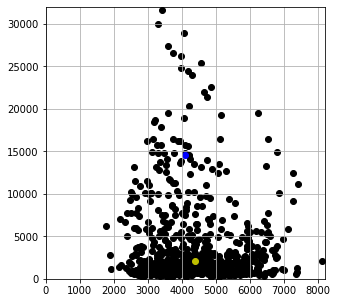

In [32]:
# Now we are going to plot the graph with Room.Board(x-axis) and F.undergrad(y-axis) along with centroids
fig=plt.figure(figsize=(5,5))
plt.scatter(df['Room.Board'], df["F.Undergrad"], color='k')
colmap={1:'y', 2:'b'}
# here * is very important because in the above centroid {1: [26, 12905]} if we don't give * it will take the list as 1 argument instead of 2
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i]) 
plt.grid()
plt.xlim(0,8200)
plt.ylim(0,32000) 
plt.show()
#Black dots are data points and color ones are centroids

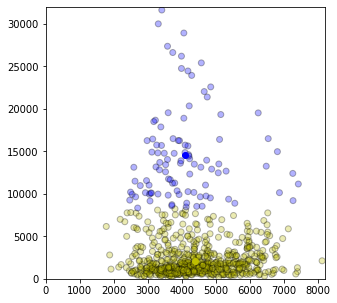

In [39]:
# Assignment stage
def assigment(df, centroids):
    # Euclidian Distance formula
    for i in centroids.keys():
        df[f'distance_from_{i}']=(np.sqrt(
                                    (df['Room.Board'] - centroids[i][0]) ** 2
                                 + (df['F.Undergrad'] - centroids[i][1]) ** 2
        )
        )

    centroid_distance_cols=[f"distance_from_{i}" for i in centroids.keys()] # its going to create new columns distance from{i}i.e distance from cluster 1 and distance from cluster 2 
    df['closest']=df.loc[:, centroid_distance_cols].idxmin(axis=1) # creating new column closest and getting which which point is closest to cluster 1 and cluster 2
    df['closest']=df['closest'].map(lambda x : int(x.lstrip('distance_from_'))) # we are going to strip out 'distance_from_'
    df['color']=df['closest'].map(lambda x : colmap[x]) # create column to add color to the points according to cluster
    return df

df=assigment(df, centroids)
# Plot the scatter plot graph
fig=plt.figure(figsize=(5,5))
plt.scatter(df['Room.Board'], df['F.Undergrad'], color=df['color'], alpha=0.3, edgecolors='k')# alpha is the intensity , k is black
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,8200)
plt.ylim(0,32000) 
plt.show()

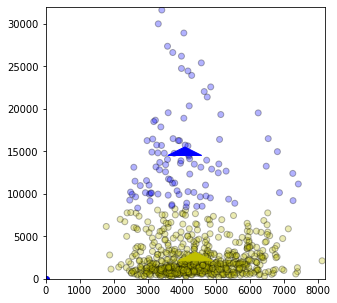

In [41]:
#Update stage
# shifting the clusters to the mean position 
import copy
old_centroids=copy.deepcopy(centroids)# old position

# To plot an arrow we require the initial point and new point
# since centroid is updated , the points close to centroid will also change and we are going to add color to these points according to cluster, this we will do later
def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['Room.Board']) 
        centroids[i][1]=np.mean(df[df['closest']==i]['F.Undergrad'])
    return k

centroids=update(centroids)

fig=plt.figure(figsize=(5,5))
ax=plt.axes()
plt.scatter(df['Room.Board'], df['F.Undergrad'], color=df['color'], alpha=0.3, edgecolors='k')
for i in centroids.keys():
    plt.scatter(*centroids, color=colmap[i])

plt.xlim(0,8200)
plt.ylim(0,32000) 
for i in old_centroids.keys():
    old_x=old_centroids[i][0]
    old_y=old_centroids[i][1]
    dx=(centroids[i][0] - old_centroids[i][0]) 
    dy=(centroids[i][1] - old_centroids[i][1]) 
    ax.arrow(old_x, old_y, dx, dy, head_width=1000, head_length=1000, fc=colmap[i], ec=colmap[i])
plt.show()
        

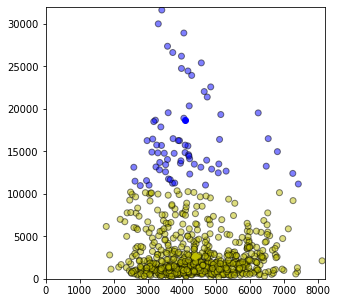

In [13]:
#Repeat Assignment Stage
# By changing the centroid , there is a chance that the data point will now be close to any other cluster
df=assigment(df, centroids)

#PLot results
fig=plt.figure(figsize=(5,5))
plt.scatter(df['Room.Board'], df['F.Undergrad'], color=df['color'], alpha=0.5, edgecolors='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,8200)
plt.ylim(0,32000) 
plt.show()

{1: [4397.148967551622, 2119.948377581121], 2: [4086.1717171717173, 14520.232323232323]}


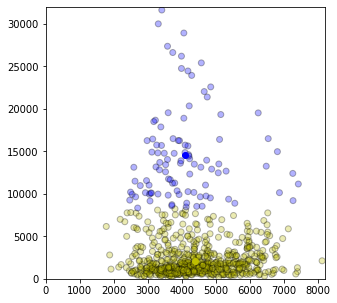

In [31]:
#Continue until all assigned categories don't change any more 

while True:
    closest_centroids=df['closest'].copy(deep=True)
    centroids=update(centroids)
    df=assigment(df, centroids)
    # Now we have to repeat the assignment step unless and until the value of closest is equal to the previous value of closest
    if closest_centroids.equals(df['closest']):
        break
 # Plot the final result        
fig=plt.figure(figsize=(5,5))
plt.scatter(df['Room.Board'], df['F.Undergrad'], color=df['color'], alpha=0.3, edgecolors='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
print(centroids)
plt.xlim(0,8200)
plt.ylim(0,32000) 
plt.show()